In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_health = pd.DataFrame(pd.read_csv("EUM_Estimaciones.csv"))

In [3]:
df_health.head()

,Preguntas,Hombres,Mujeres
0,Pregunta1_1,8.9,8.9
1,Pregunta1_2,8.1,8.3
2,Pregunta1_3,8.0,7.8
3,Pregunta1_4,6.6,7.4
4,Pregunta1_5,8.9,8.9


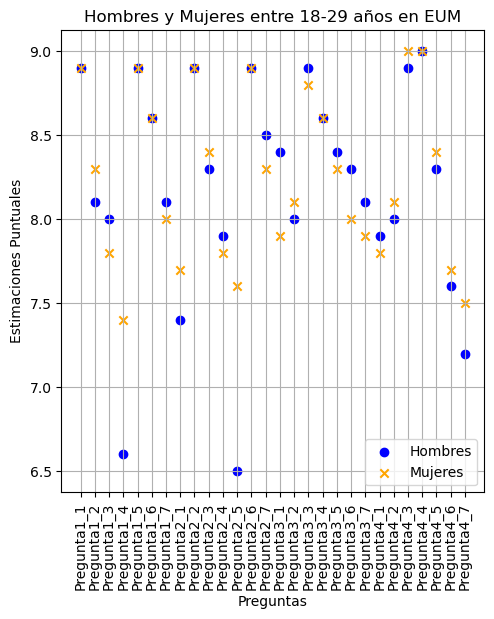

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(df_health["Preguntas"], df_health["Hombres"], marker='o', color='blue', label='Hombres')
plt.scatter(df_health["Preguntas"], df_health["Mujeres"], marker='x', color='orange', label='Mujeres')
plt.xticks(rotation=90)
plt.xlabel('Preguntas')
plt.ylabel('Estimaciones Puntuales')
plt.title('Hombres y Mujeres entre 18-29 años en EUM')
plt.legend()
plt.grid(True) 
plt.show()

In [5]:
df_health_Puebla = pd.DataFrame(pd.read_csv("Puebla_Estimaciones.csv"))

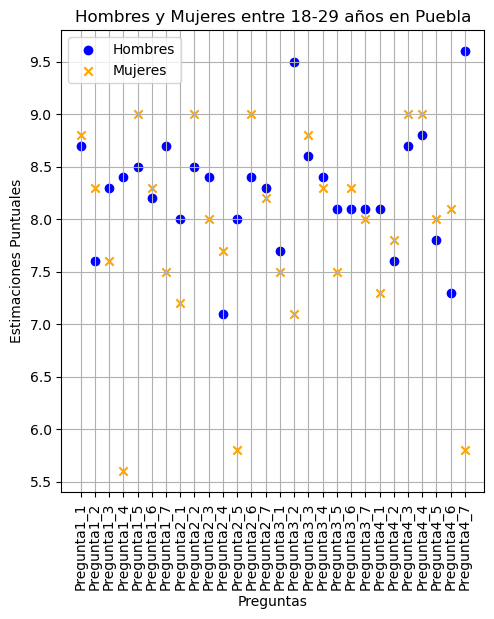

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(df_health_Puebla["Preguntas"], df_health_Puebla["Hombres"], marker='o', color='blue', label='Hombres')
plt.scatter(df_health_Puebla["Preguntas"], df_health_Puebla["Mujeres"], marker='x', color='orange', label='Mujeres')
plt.xticks(rotation=90)
plt.xlabel('Preguntas')
plt.ylabel('Estimaciones Puntuales')
plt.title('Hombres y Mujeres entre 18-29 años en Puebla')
plt.legend()
plt.grid(True) 
plt.show()

In [7]:
df_health_2 = pd.DataFrame(pd.read_csv("Mental_Health_Mexico.csv"))

In [8]:
df_health_2.head()

,Total,Hombre,Mujeres,Año,Casos seleccionados,Estado
0,66.96,37.45,95.27,2020,Depresion,Estados Unidos Mexicanos
1,1.47,0.98,1.95,2020,Anorexia_Bulimia,Estados Unidos Mexicanos
2,71.03,34.95,106.04,2020,Depresion,Aguascalientes
3,1.46,0.85,2.06,2020,Anorexia_Bulimia,Aguascalientes
4,98.19,60.09,136.21,2020,Depresion,Baja California


In [9]:
df_EUM = df_health_2[df_health_2['Estado'] == 'Estados Unidos Mexicanos']

In [10]:
df_EUM

,Total,Hombre,Mujeres,Año,Casos seleccionados,Estado
0,66.96,37.45,95.27,2020,Depresion,Estados Unidos Mexicanos
1,1.47,0.98,1.95,2020,Anorexia_Bulimia,Estados Unidos Mexicanos
66,81.48,44.21,117.22,2021,Depresion,Estados Unidos Mexicanos
67,2.39,1.17,3.55,2021,Anorexia_Bulimia,Estados Unidos Mexicanos
132,102.46,54.10,148.83,2022,Depresion,Estados Unidos Mexicanos
133,4.06,1.98,6.05,2022,Anorexia_Bulimia,Estados Unidos Mexicanos


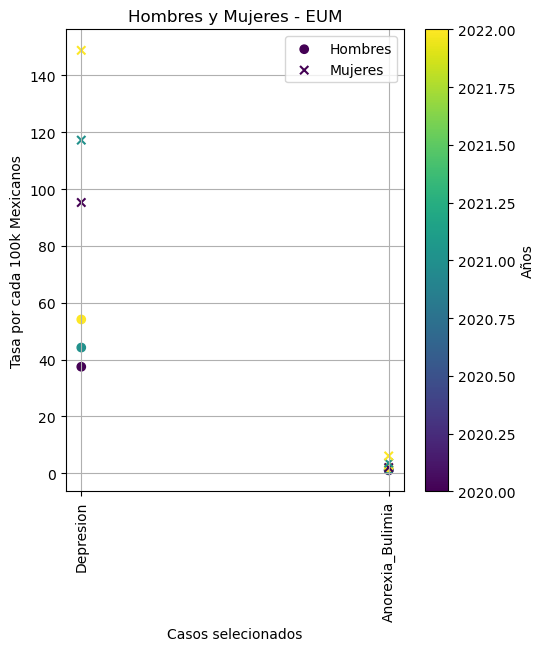

In [11]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2)
norm = plt.Normalize(df_EUM['Año'].min(), df_EUM['Año'].max())
colors = plt.cm.viridis(norm(df_EUM['Año']))
plt.scatter(df_EUM["Casos seleccionados"], df_EUM["Hombre"], marker='o', c=colors, label='Hombres')
plt.scatter(df_EUM["Casos seleccionados"], df_EUM["Mujeres"], marker='x', c=colors, label='Mujeres')
plt.xticks(rotation=90)
plt.xlabel('Casos selecionados')
plt.ylabel('Tasa por cada 100k Mexicanos')
plt.title('Hombres y Mujeres - EUM')
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar = plt.colorbar(sm, ax=ax, label='Años')
plt.legend()
plt.grid(True) 
plt.show()

In [12]:
df_Puebla = df_health_2[df_health_2['Estado'] == 'Puebla']

In [13]:
df_Puebla

,Total,Hombre,Mujeres,Año,Casos seleccionados,Estado
42,33.54,21.65,44.59,2020,Depresion,Puebla
43,0.97,1.01,0.94,2020,Anorexia_Bulimia,Puebla
108,48.79,29.74,66.52,2021,Depresion,Puebla
109,0.98,0.28,1.62,2021,Anorexia_Bulimia,Puebla
174,62.74,39.97,83.91,2022,Depresion,Puebla
175,1.25,0.37,2.07,2022,Anorexia_Bulimia,Puebla


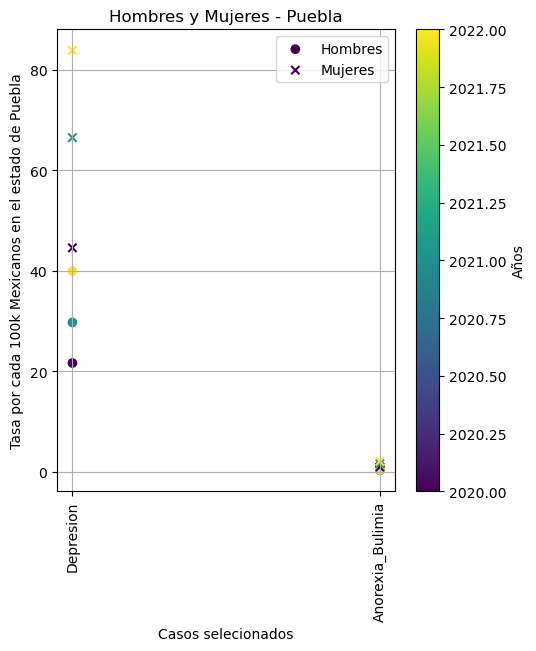

In [14]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2)
norm = plt.Normalize(df_Puebla['Año'].min(), df_EUM['Año'].max())
colors = plt.cm.viridis(norm(df_Puebla['Año']))
plt.scatter(df_Puebla["Casos seleccionados"], df_Puebla["Hombre"], marker='o', c=colors, label='Hombres')
plt.scatter(df_Puebla["Casos seleccionados"], df_Puebla["Mujeres"], marker='x', c=colors, label='Mujeres')
plt.xticks(rotation=90)
plt.xlabel('Casos selecionados')
plt.ylabel('Tasa por cada 100k Mexicanos en el estado de Puebla')
plt.title('Hombres y Mujeres - Puebla')
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar = plt.colorbar(sm, ax=ax, label='Años')
plt.legend()
plt.grid(True) 
plt.show()

In [15]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_health_2)
categorical_columns = categorical_columns_selector(df_health_2)

In [16]:
X_numeric = df_health_2[numerical_columns].values
X_categorical = df_health_2[categorical_columns].values 

In [17]:
from kmodes.kprototypes import KPrototypes

X = np.hstack((X_categorical, X_numeric))

# K-Prototypes
kproto = KPrototypes(n_clusters=3, init='Cao', n_init=5, verbose=0) 

clusters = kproto.fit_predict(X, categorical=[0, 1])

df_health_2['cluster'] = clusters

clusters

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2],
      dtype=uint16)

In [18]:
df_2020 = df_health_2[df_health_2['Año'] == 2020]

In [19]:
df_2020.head()

,Total,Hombre,Mujeres,Año,Casos seleccionados,Estado,cluster
0,66.96,37.45,95.27,2020,Depresion,Estados Unidos Mexicanos,0
1,1.47,0.98,1.95,2020,Anorexia_Bulimia,Estados Unidos Mexicanos,2
2,71.03,34.95,106.04,2020,Depresion,Aguascalientes,0
3,1.46,0.85,2.06,2020,Anorexia_Bulimia,Aguascalientes,2
4,98.19,60.09,136.21,2020,Depresion,Baja California,0


In [20]:
df_2020[df_2020['Estado'] == "Durango"]

,Total,Hombre,Mujeres,Año,Casos seleccionados,Estado,cluster
20,183.84,98.39,267.01,2020,Depresion,Durango,1
21,0.64,0.54,0.74,2020,Anorexia_Bulimia,Durango,2


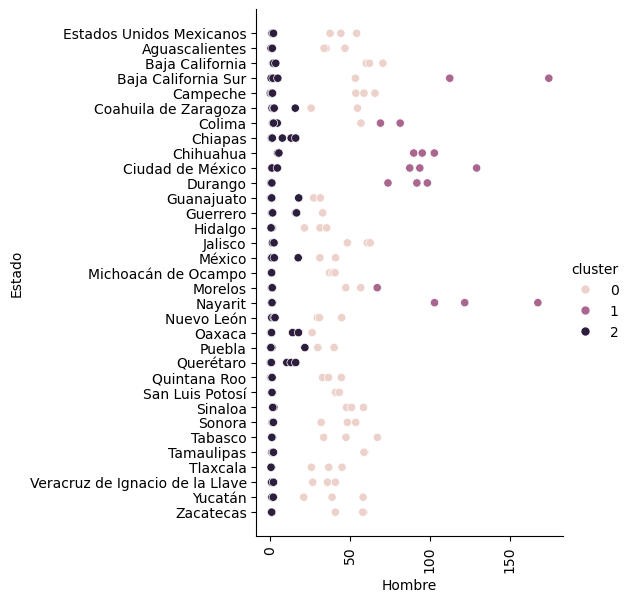

In [21]:
sns.relplot(x='Hombre', y='Estado', hue='cluster', data=df_health_2, height=6)
plt.xticks(rotation=90)
plt.show()

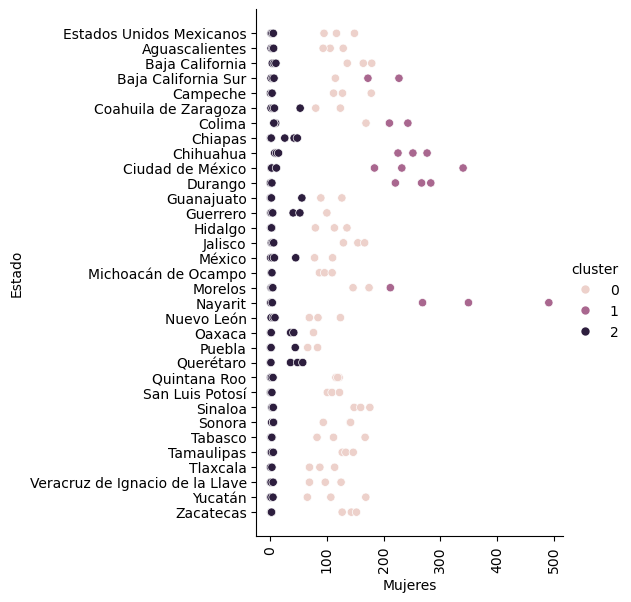

In [38]:
sns.relplot(x='Mujeres', y='Estado', hue='cluster', data=df_health_2, height=6)
plt.xticks(rotation=90)
plt.show()

In [22]:
df_2021 = df_health_2[df_health_2['Año'] == 2021]

In [23]:
df_2021["cluster"].value_counts()

cluster
2    37
0    23
1     6
Name: count, dtype: int64

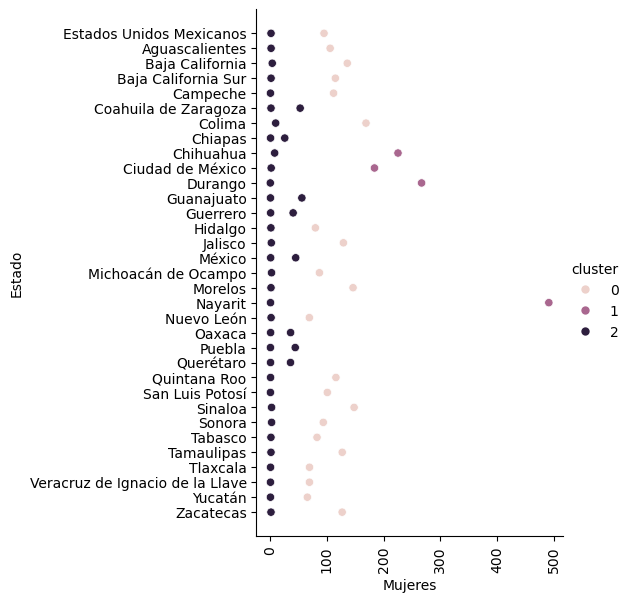

In [24]:
sns.relplot(x='Mujeres', y='Estado', hue='cluster', data=df_2020, height=6)
plt.xticks(rotation=90)
plt.show()

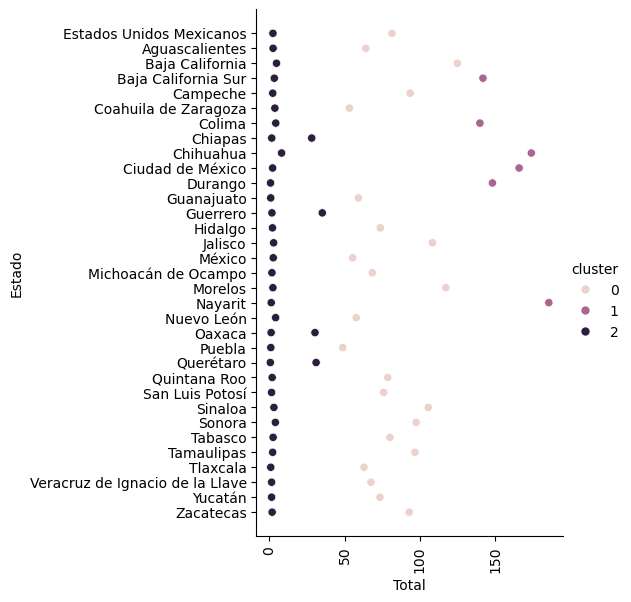

In [25]:
sns.relplot(x='Total', y='Estado', hue='cluster', data=df_2021, height=6)
plt.xticks(rotation=90)
plt.show()

In [26]:
df_2022 = df_health_2[df_health_2['Año'] == 2022]

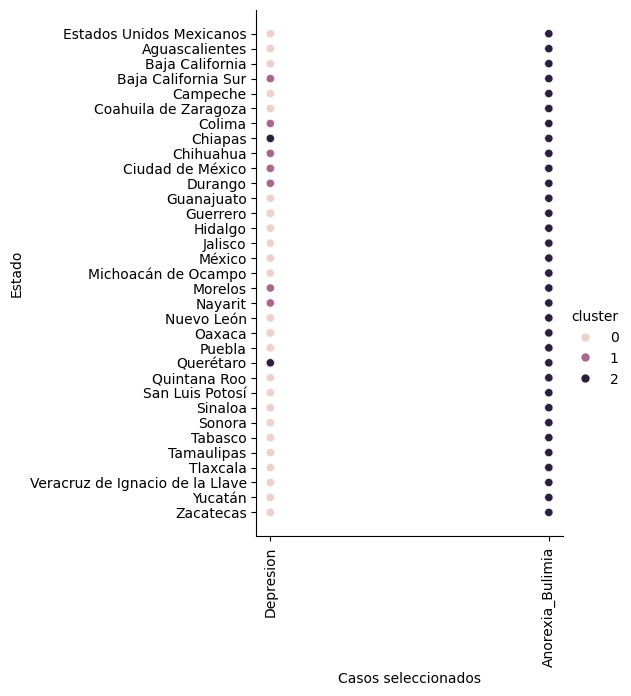

In [35]:
sns.relplot(x='Casos seleccionados', y='Estado', hue='cluster', data=df_health_2, height=6)
plt.xticks(rotation=90)
plt.show()

In [28]:
df_health_mex = pd.DataFrame(pd.read_csv("Estimaciones.csv"))

In [29]:
df_health_mex.head()

,Sexo,Estado,Pregunta1_1,Pregunta1_2,Pregunta1_3,Pregunta1_4,Pregunta2_1,Pregunta2_2,Pregunta2_3,Pregunta2_4,...,Pregunta5_3,Pregunta5_4,Pregunta6_1,Pregunta6_2,Pregunta6_3,Pregunta6_4,Pregunta7_1,Pregunta7_2,Pregunta7_3,Pregunta7_4
0,Hombres,Puebla,8.7,7.6,8.3,8.4,8.5,8.2,8.7,8.0,...,8.1,8.1,8.1,8.1,7.6,8.7,8.8,7.8,7.3,9.6
1,Mujeres,Puebla,8.8,8.3,7.6,5.6,9.0,8.3,7.5,7.2,...,7.5,8.3,8.0,7.3,7.8,9.0,9.0,8.0,8.1,5.8
2,Hombres,CDMX,8.9,7.3,6.4,3.7,8.8,8.0,6.2,5.0,...,7.9,8.3,8.6,6.4,6.5,8.8,8.9,7.4,6.3,0.0
3,Mujeres,CDMX,8.7,7.7,6.5,5.8,8.6,8.1,7.2,7.4,...,8.3,6.6,7.4,7.5,7.6,8.7,8.7,7.7,6.9,6.9
4,Hombres,NL,9.0,8.8,6.9,10.0,9.0,8.9,7.6,4.0,...,8.6,8.0,7.3,9.2,7.9,9.2,9.0,9.0,6.9,6.0


In [30]:
numeric_columns = df_health_mex.columns[2:28]  
categorical_columns = df_health_mex.columns[0:2] 

X_numeric = df_health_mex[numeric_columns].values
X_categorical = df_health_mex[categorical_columns].values 

In [31]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes

X = np.hstack((X_categorical, X_numeric))

# K-Prototypes
kproto = KPrototypes(n_clusters=3, init='Cao', n_init=5, verbose=0) 

clusters = kproto.fit_predict(X, categorical=[0, 1])

df_health_mex['cluster'] = clusters

clusters

array([2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2], dtype=uint16)

In [32]:
df_health_mex

,Sexo,Estado,Pregunta1_1,Pregunta1_2,Pregunta1_3,Pregunta1_4,Pregunta2_1,Pregunta2_2,Pregunta2_3,Pregunta2_4,...,Pregunta5_4,Pregunta6_1,Pregunta6_2,Pregunta6_3,Pregunta6_4,Pregunta7_1,Pregunta7_2,Pregunta7_3,Pregunta7_4,cluster
0,Hombres,Puebla,8.7,7.6,8.3,8.4,8.5,8.2,8.7,8.0,...,8.1,8.1,8.1,7.6,8.7,8.8,7.8,7.3,9.6,2
1,Mujeres,Puebla,8.8,8.3,7.6,5.6,9.0,8.3,7.5,7.2,...,8.3,8.0,7.3,7.8,9.0,9.0,8.0,8.1,5.8,2
2,Hombres,CDMX,8.9,7.3,6.4,3.7,8.8,8.0,6.2,5.0,...,8.3,8.6,6.4,6.5,8.8,8.9,7.4,6.3,0.0,0
3,Mujeres,CDMX,8.7,7.7,6.5,5.8,8.6,8.1,7.2,7.4,...,6.6,7.4,7.5,7.6,8.7,8.7,7.7,6.9,6.9,2
4,Hombres,NL,9.0,8.8,6.9,10.0,9.0,8.9,7.6,4.0,...,8.0,7.3,9.2,7.9,9.2,9.0,9.0,6.9,6.0,2
5,Mujeres,NL,9.2,8.5,8.6,7.9,9.3,8.7,8.3,7.9,...,8.7,7.9,7.7,8.4,9.4,9.2,8.9,8.1,8.5,2
6,Hombres,JL,9.0,8.0,8.2,7.3,8.9,8.8,8.1,8.5,...,8.2,7.5,7.4,8.1,9.1,9.1,8.3,7.7,8.0,2
7,Mujeres,JL,9.0,8.6,7.8,8.6,8.9,8.7,8.4,8.5,...,8.2,7.9,8.4,8.1,9.1,9.1,8.7,7.9,7.7,2
8,Hombres,QRoo,8.7,8.0,7.9,6.0,8.8,8.2,7.8,0.0,...,8.0,9.0,7.3,8.3,8.6,8.7,7.9,8.4,7.7,1
9,Mujeres,QRoo,8.7,7.7,7.0,9.7,8.7,8.5,6.6,8.9,...,7.2,7.9,5.9,7.8,8.9,8.8,7.6,7.9,7.8,2


In [33]:
df_health_mex["cluster"].value_counts()

cluster
2    10
0     1
1     1
Name: count, dtype: int64

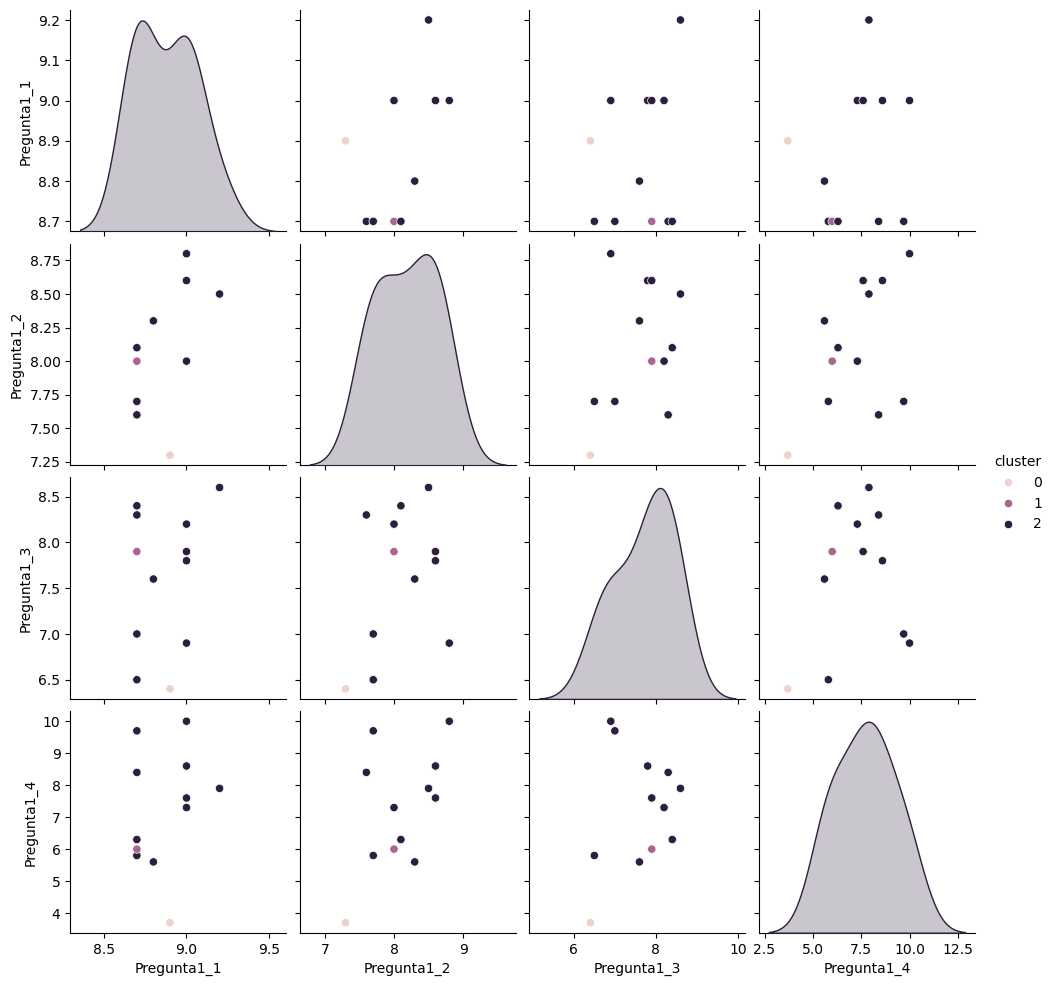

In [34]:
sns.pairplot(df_health_mex, hue='cluster', vars=numeric_columns[:4], diag_kind='kde') 
plt.show()